In [34]:
#Importamos las librerias 
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [35]:
datos = pd.read_csv('./Mall_Customers.csv')

In [36]:
datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
print(datos['Gender'].unique())

['Male' 'Female']


In [38]:
datos['Gender'] = datos['Gender'].map({'Male': 1, 'Female': 0})

In [39]:
datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [40]:
datos.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de valores atípicos con Annual_Income')

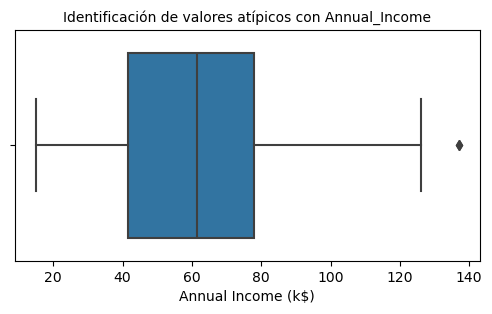

In [41]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['Annual Income (k$)'])
plt.title('Identificación de valores atípicos con Annual_Income', fontsize=10)

Text(0.5, 1.0, 'Identificación de valores atípicos con Spending Score')

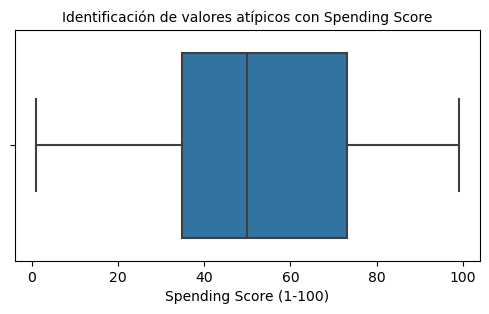

In [42]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['Spending Score (1-100)'])
plt.title('Identificación de valores atípicos con Spending Score', fontsize=10)

Text(0.5, 1.0, 'Identificación de valores atípicos con Age')

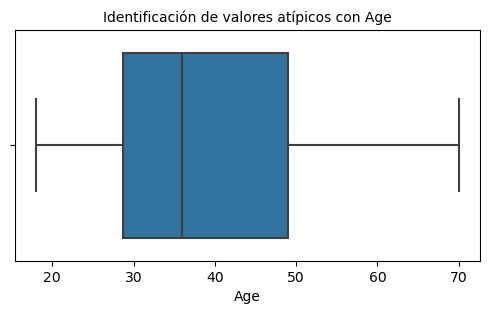

In [43]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['Age'])
plt.title('Identificación de valores atípicos con Age', fontsize=10)

In [44]:
# Assuming 'datos' is a dictionary with key-value pairs
df = pd.DataFrame(datos)

# Check for zero values in each column
print("Cantidad con registros en cero: ")
for col in df.columns:
    # Convert the column to a Series
    series = df[col]
    # Check for zeros using isin()
    zero_count = series.isin([0]).sum()
    print(f"- {col}: {zero_count}")

Cantidad con registros en cero: 
- CustomerID: 0
- Gender: 112
- Age: 0
- Annual Income (k$): 0
- Spending Score (1-100): 0


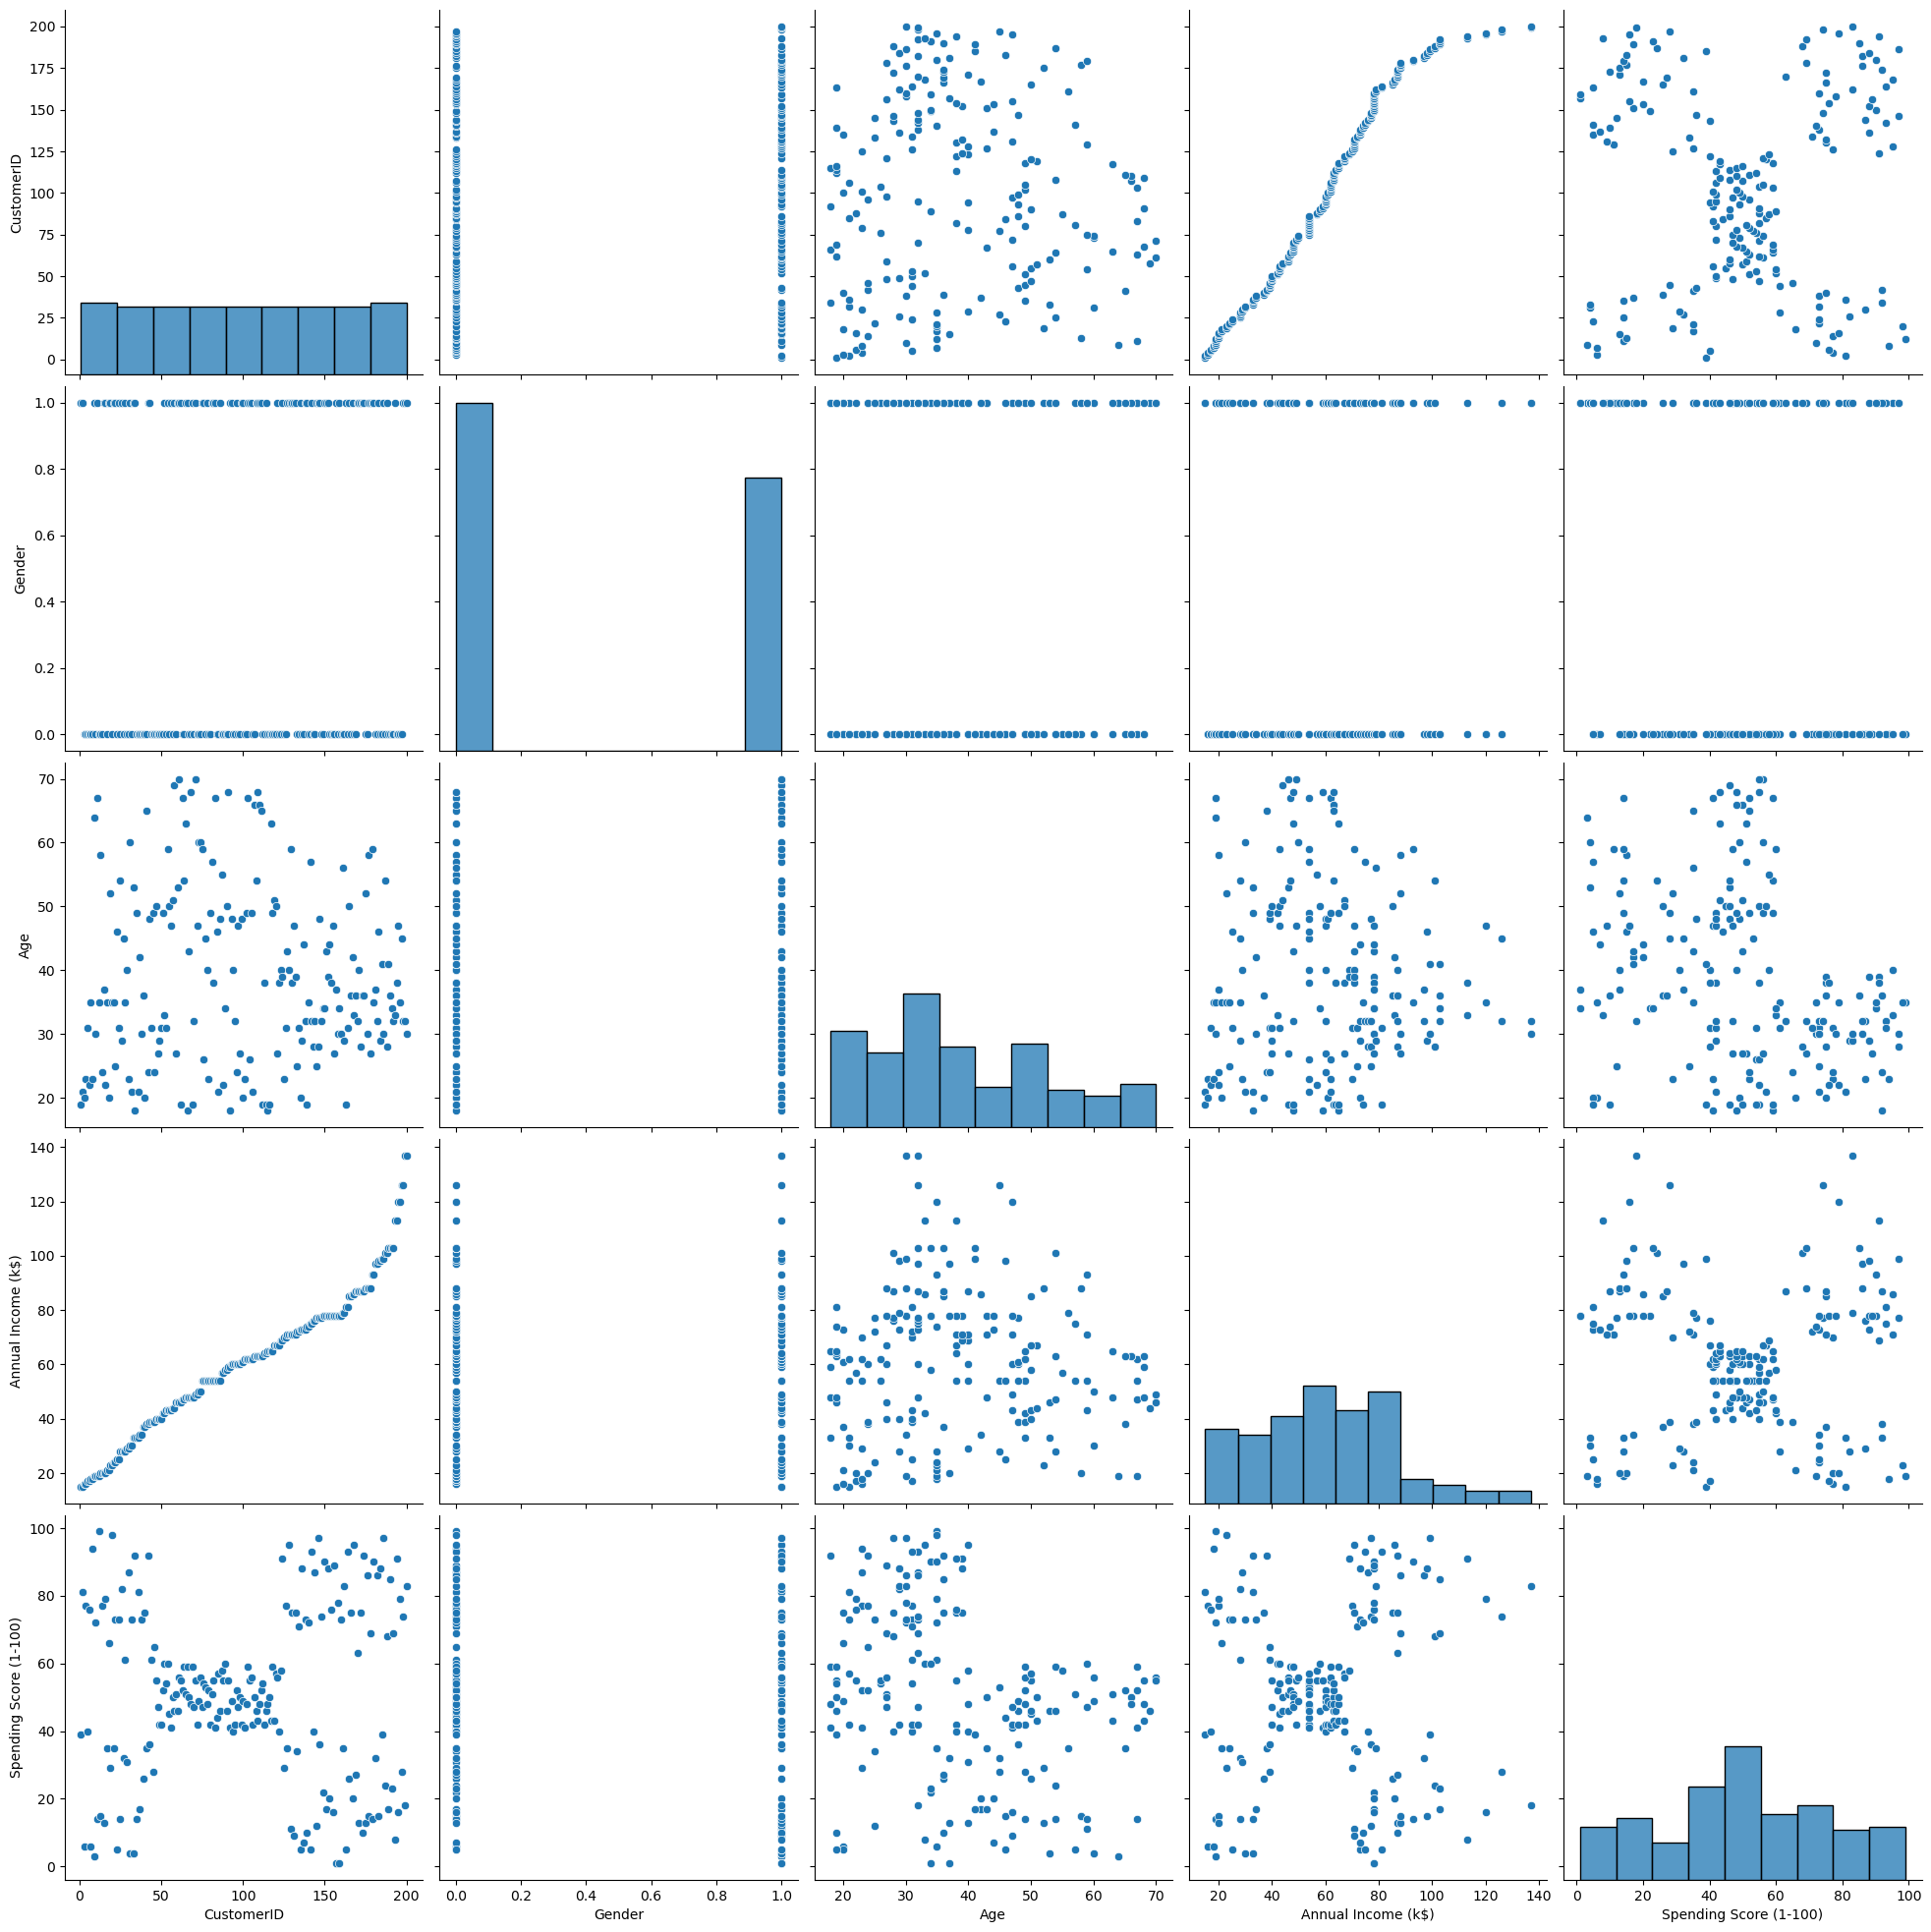

In [45]:
# Assuming 'datos' is a dictionary with key-value pairs
df = pd.DataFrame(datos)

# Create the scatter pairplot
sns.pairplot(df.dropna(), size=4, kind='scatter')

In [46]:
# Assuming 'datos' is a dictionary with key-value pairs
df = pd.DataFrame(datos)

# Calculate the correlation matrix
corr_matrix = df.corr()

In [50]:
corr_matrix = datos.corr()
corr_matrix

,Age,Annual Income (k$),Gender
Age,1.000000,-0.012398,0.060867
Annual Income (k$),-0.012398,1.000000,0.056410
Gender,0.060867,0.056410,1.000000


In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 200 non-null    int64
 1   Annual Income (k$)  200 non-null    int64
 2   Gender              200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [52]:
datos=datos[['Age','Annual Income (k$)','Gender']]

In [53]:
datos.head()

,Age,Annual Income (k$),Gender
0,19,15,1
1,21,15,1
2,20,16,0
3,23,16,0
4,31,17,0


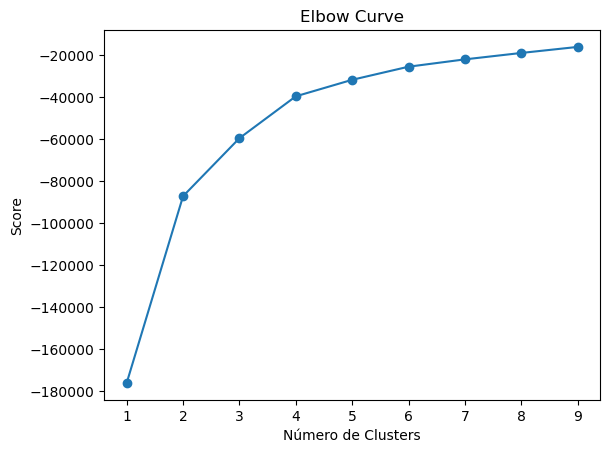

In [54]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [55]:
Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(datos)

KMeans(n_clusters=6, random_state=0)

In [56]:
Modelo.labels_
datos["Grupo"] = Modelo.labels_
print(datos)

     Age  Annual Income (k$)  Gender  Grupo
0     19                  15       1      1
1     21                  15       1      1
2     20                  16       0      1
3     23                  16       0      1
4     31                  17       0      1
..   ...                 ...     ...    ...
195   35                 120       0      0
196   45                 126       0      0
197   32                 126       1      0
198   32                 137       1      0
199   30                 137       1      0

[200 rows x 4 columns]


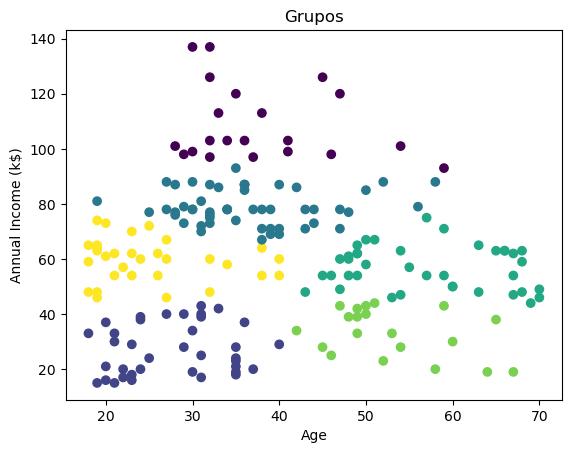

In [57]:
plt.scatter(datos['Age'], datos['Annual Income (k$)'], c=datos ['Grupo'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Grupos')
plt.show()

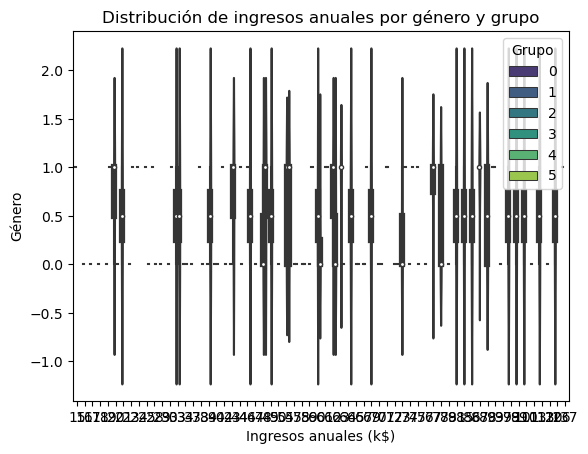

In [64]:
sns.violinplot(
    x="Annual Income (k$)",
    y="Gender",
    hue="Grupo",
    data=datos,
    palette="viridis",
    size="hue",
    showmeans=True,  # Add means as markers
)
plt.title("Distribución de ingresos anuales por género y grupo")
plt.xlabel("Ingresos anuales (k$)")
plt.ylabel("Género")
plt.legend(title="Grupo")
plt.show()

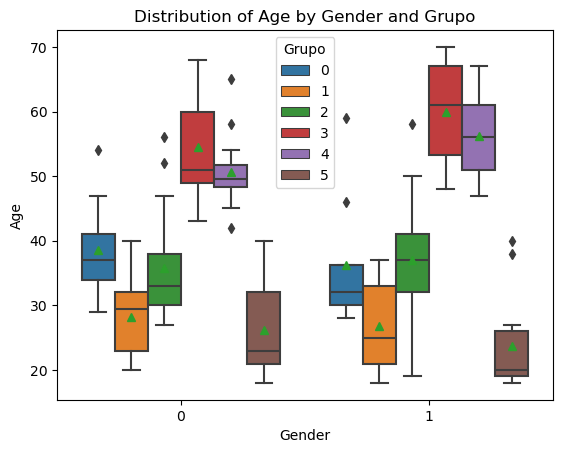

In [63]:
sns.boxplot(
    x = "Gender",
    y = "Age",
    hue = "Grupo",  # Group data by 'Grupo' for color differentiation
    showmeans=True,  # Show mean values as markers within the boxes
    data=datos
)

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender and Grupo')
plt.show()

Text(0, 0.5, 'Euclidean distance')

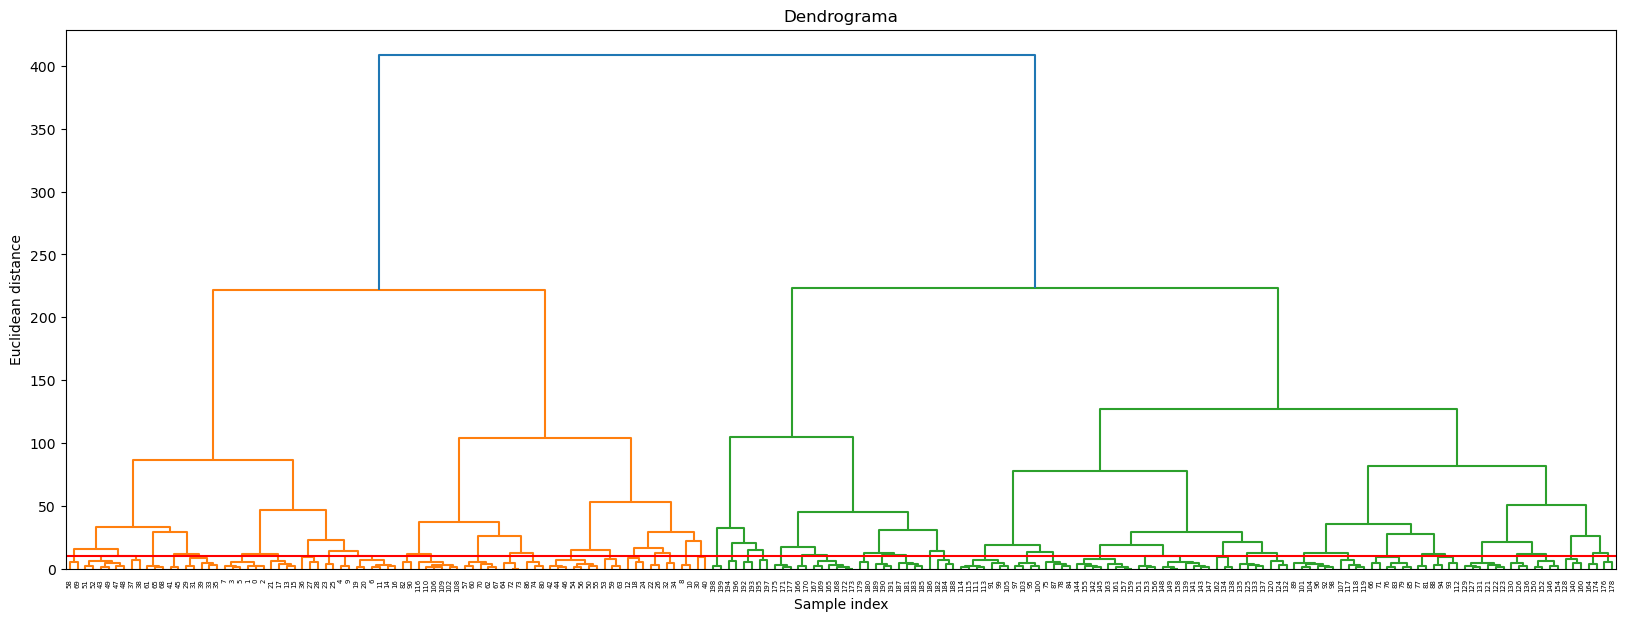

In [70]:
ward_clustering = linkage(datos, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y=10, color='r', linestyle='-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [71]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(datos)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [72]:
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

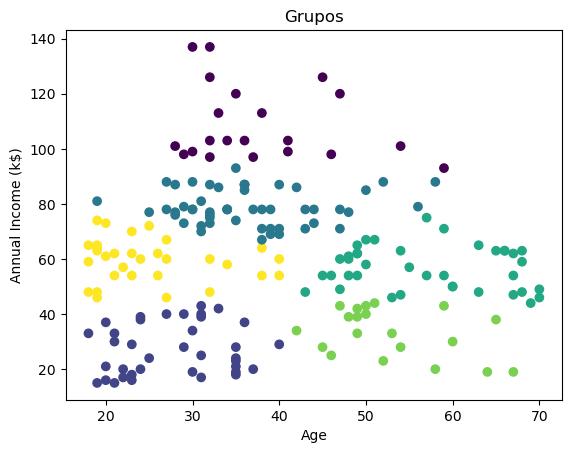

In [78]:
plt.scatter(datos['Age'], datos['Annual Income (k$)'], c=datos ['Grupo'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Grupos')
plt.show()

In [79]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

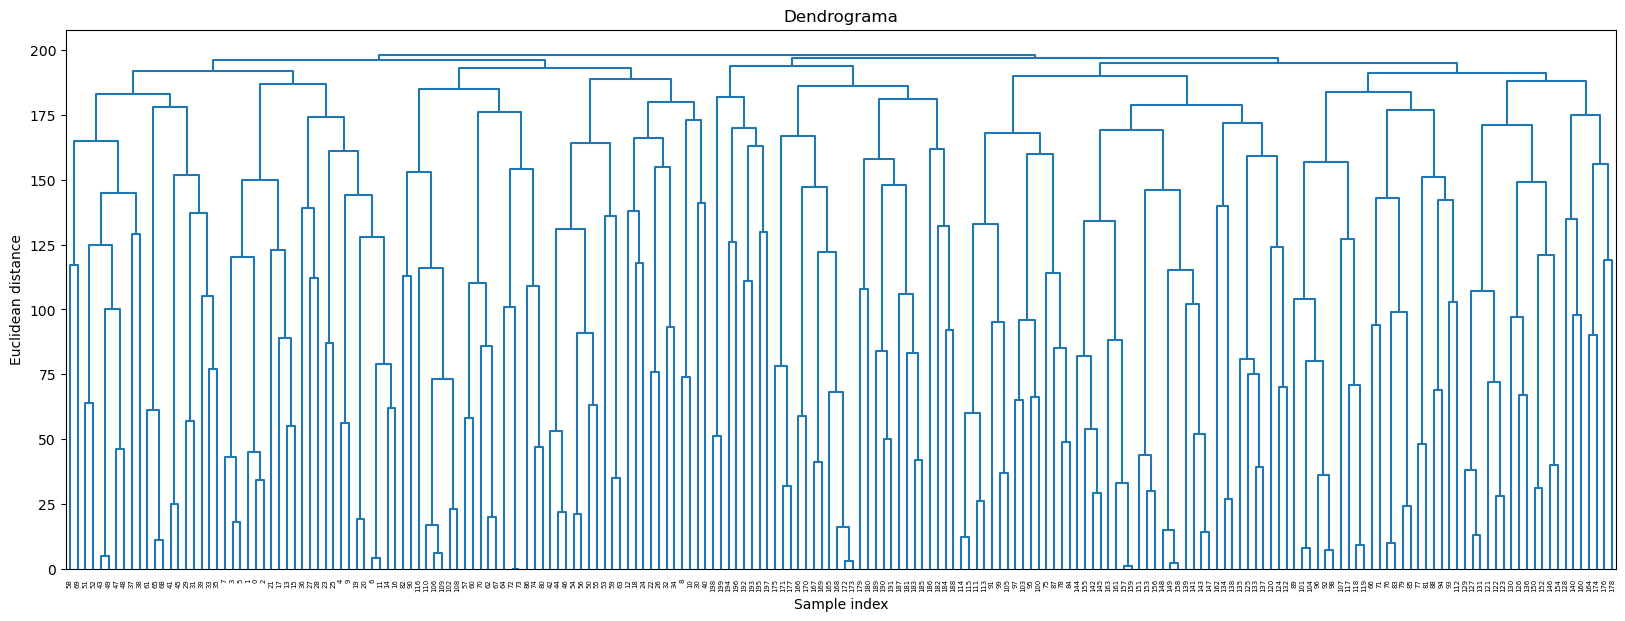

In [80]:
plot_dendrogram(hier_clustering, color_threshold=0)

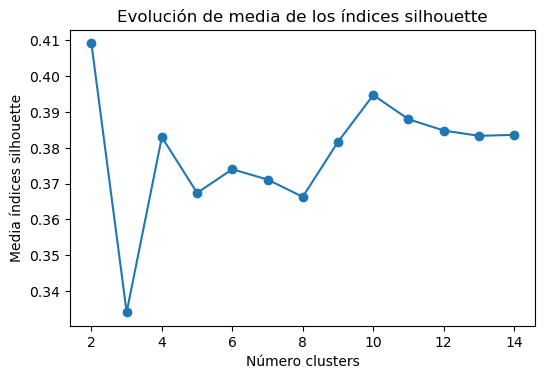

In [82]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(datos)
    silhouette_avg = silhouette_score(datos, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [83]:
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(datos, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(datos, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(datos, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.334091073253103
Índice de Calinski-Harabasz: 156.50496873134767
Davies-Bouldin Index: 0.9839262786231694


In [87]:
from scipy.cluster.hierarchy import linkage
# Compute the distances
datos_dist = pdist(datos)
# Compute the linkage matrix
Z = linkage(datos, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, datos_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6132432485086086, array([ 1.91485422,  1.73205081,  5.56776436, ..., 32.61901286,
       32.61901286,  2.        ]))
